### PES University, Bangalore
### Established under Karnataka Act No. 16 of 2013
### UE20CS312 - Data Analytics - Worksheet 3b - AR and MA models
### Designed by Vishruth Veerendranath, Dept. of CSE - vishruth@pesu.pes.edu


#### Renita Kurian - PES1UG20CS331

### AR and MA models
Auto Regressive and Moving Average are some of the most powerful, yet simple models for time-series forecasting. They can be used individually or together as ARMA. There are many other variations as well. We will use these models to forecast time-series in this worksheet

### Task
Cryptocurrency is all the rage now and it uses the very exciting technology behind blockchain. People even claim it to be revolutionary. But if you have invested in cryptocurrencies, you know how volatile these cryptocurrencies really are! People have become billionaires by investing in crypto, and others have lost all their money on crypto. The most recent instance of this volatility was seen during the Terra Luna crash. Find more info about that [here](https://www.forbes.com/sites/lawrencewintermeyer/2022/05/25/from-hero-to-zero-how-terra-was-toppled-in-cryptos-darkest-hour/?sh=5a7e83bf389e) and [here](https://c.ndtvimg.com/2021-02/4lo9ita_elon-musk-dogecoin-meme_625x300_04_February_21.jpg) if you are interested.

Your task is to effectively forecast the prices of **DogeCoin**, a crypto that started as a meme but now is a crypto that people actually invest in. DogeCoin prices however, are affected even by a single tweet by Elon Musk. The image below tweeted by Elon Musk shot up the prices of DogeCoin by 200%!

<!-- ![image](https://c.ndtvimg.com/2021-02/4lo9ita_elon-musk-dogecoin-meme_625x300_04_February_21.jpg =100x100) -->
<img src="https://c.ndtvimg.com/2021-02/4lo9ita_elon-musk-dogecoin-meme_625x300_04_February_21.jpg" width="300" height="200" />

You have been provided with the daily prices of DogeCoin from `15-08-2021` to `15-08-2022` a period of 1 year (365 days) in the file `doge.csv`

Please download the data from this [Github repo](https://github.com/Data-Analytics-UE20CS312/Unit-3-Worksheets/blob/master/3b%20-%20AR%20and%20MA%20models/doge.csv)


### Data Dictionary

Date - Date on which price was recorded     
Price - Price of DogeCoin on a particular day

### Data Ingestion and Preprocessing
- Read the file into a `Pandas` DataFrame object

In [59]:
import pandas as pd
df = pd.read_csv('/doge.csv')

df.head()

,Date,Price
0,2021-08-15,0.348722
1,2021-08-16,0.349838
2,2021-08-17,0.345208
3,2021-08-18,0.331844
4,2021-08-19,0.321622


### Prerequisites

- Set up a new conda env or use an existing one that has `jupyter-notebook` and `ipykernel` installed (Conda envs come with these by default) [Reference](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html)
- Instead, you can also use a python venv and install `ipykernel` manually (We instead suggest using conda instead for easy setup) [Reference](https://docs.python.org/3/tutorial/venv.html)
- Install the `statsmodels` package either in your Conda environment or Python venv. Refer to [the installation guide](https://www.statsmodels.org/dev/install.html)

### Points

The problems in this worksheet are for a total of 10 points with each problem having a different weightage. 
- Problem 0: 0.5 points
- Problem 1: 1.5 point
- Problem 2: 2 points
- Problem 3: 1 points
- Problem 4: 2 point
- Problem 5: 1 point
- Problem 6: 1 points


**HINTS FOR ALL PROBLEMS**: 
- Consider using `inplace=True` or assign it to new DataFrame, when using pandas transformations. If none of these are done, the DataFrame will remain the same
- Search for functions in the `statsmodels` [documentation](https://www.statsmodels.org/dev/index.html)

### Problem 0 (0.5 point)
- Set the index of DataFrame to the `Date` column to make it a time series

In [60]:
df.set_index('Date', inplace=True)
df.head()

,Price
Date,
2021-08-15,0.348722
2021-08-16,0.349838
2021-08-17,0.345208
2021-08-18,0.331844
2021-08-19,0.321622


### Problem 1 (1.5 point)
- Plot the time-series. Analyze the stationarity from the time-series. Provide reasoning for stationarity/non-stationarity based on visual inspection of time-series plot (0.5 point)

- Plot the ACF plot of the Time series (upto 50 lags). Analyze the stationarity from ACF plot and provide reasoning (Hint: look at functions in `statsmodels` package) (1 Point)

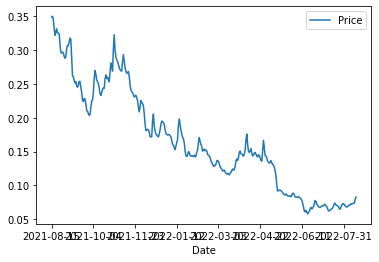

In [61]:
#Plotting time-series
df.plot()

Above graph shows downwards trend and hence its non-stationary.

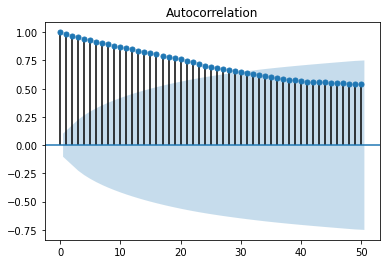

In [62]:
#ACF Plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=50)
plt.show()

Graph shows decrease in ACF and hence its non-stationary.

### Problem 2 (2 point)

- Run Augmented Dickey Fuller Test. Analyze whether the time-series is stationary, based on ADF results (1 point)     
    
Hint: Use the `print_adf_results` function below to print the results of the ADF function cleanly after obtaining results from the library function. Pass the results from library function to `print_adf_results` function

In [63]:
def print_adf_results(adf_result):
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))

- If not stationary, apply appropriate transformations. Run the ADF test again to show stationarity after transformation (1 Point)
      
Hint: `diff` and `dropna`. Assign the DataFrame after transformation to a new DataFrame with name `transformed_df`

In [64]:
# ADF test
from statsmodels.tsa.stattools import adfuller
res = adfuller(df)
#print(res)
print_adf_results(res)

ADF Statistic: -1.558935
p-value: 0.504182
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


p-value is greater than 0.05 and hence we cannot reject null hypothesis. Therefore, it can be inferred that the time-series is non-stationary.

ADF Statistic: -5.593446
p-value: 0.000001
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


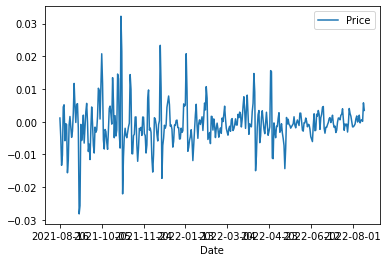

In [65]:
#Transformation of df
transformed_df = df.diff().dropna()
res1 = adfuller(transformed_df)
print_adf_results(res1)
transformed_df.plot()

### Problem 3 (1 point)

- Plot both ACF and PACF plot. From these select optimal parameters for the ARIMA(p,q) model     

Hint: Negative values that are significantly outside the Confidence interval are considered significant too.        
Hint: `p+q = 3`

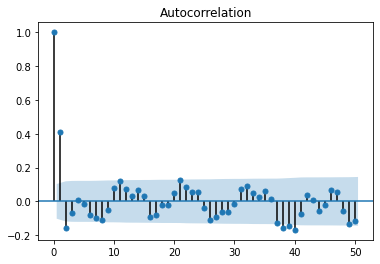

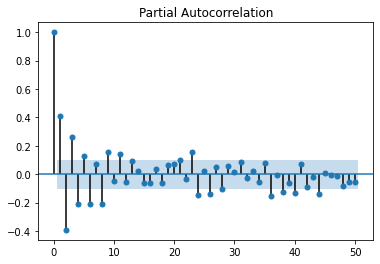

In [66]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(transformed_df, lags=50)
plt.show()

import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_pacf(transformed_df, lags=50)
plt.show()

From ACF, q = 1  
From PACF, p = 2 

### Problem 4 (2 point)
- Write a function to forecast values using only AR(p) model (2 Points)     
Only use `pandas` functions and Linear Regression from `sklearn`. [LR documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)      

Hint: Create p new columns in a new DataFrame that is a copy of `transformed_df`       
Each new column has lagged value of Price. `Price_t-i` (From `Price_t-1` upto `Price_t-p`)      
Look at the `shift` function in pandas to create these new columns [Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html)

In [67]:
### Adding columns for lagged values
arima_df = transformed_df.copy()

## AR terms 
p = 2

# Creating p new columns, for p lagged values
for i in range(1,p+1): 
    arima_df[f'Price_t-{i}'] = arima_df['Price'].shift(i)

arima_df.dropna(inplace=True)
arima_df.head()

,Price,Price_t-1,Price_t-2
Date,,,
2021-08-18,-0.013363,-0.004630,0.001116
2021-08-19,-0.010222,-0.013363,-0.004630
2021-08-20,0.004498,-0.010222,-0.013363
2021-08-21,0.005169,0.004498,-0.010222
2021-08-22,-0.005841,0.005169,0.004498


Hint:
- **Seperate into `X_train` and `y_train` for linear regression**  
- We know that AR(p) is linear regression with p lagged values, and we have created p new columns with the p lagged values        
- `X_train` is training input that consists of the columns `Price_t-1` upto `Price_t-p` (p columns in total) 
- `y_train` is the training output (truth values) of the Price, i.e the `Price` column (Only 1 column)

In [68]:
X_train = arima_df[['Price_t-1', 'Price_t-2']].values
y_train = arima_df['Price'].values

- Set up the Linear Regression between `X_train` and `y_train` [LR documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)      

Name the `LinearRegression()` object `lr`

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
lr.coef_

array([ 0.57292128, -0.39148166])

In [71]:
# Adding new column with predictions using the LR coefficients. The LR Coefficients are Alpha values or AR coefficients
arima_df['AR_Prediction'] = X_train.dot(lr.coef_.T) + lr.intercept_

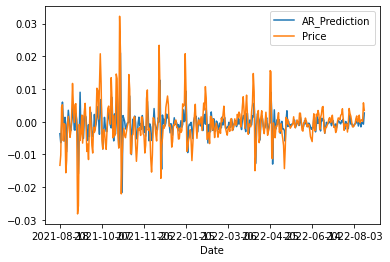

In [72]:
arima_df.plot(y=['AR_Prediction', 'Price'])

Once you get predicitons like this using AR you would have to, undifference the predictions (which are differenced), but we will not deal with that here. 
For some hints on how to undifference the data to get actual predictions look [here](https://stackoverflow.com/questions/49903037/pandas-reverse-of-diff)

### Problem 5 (1 Point)

Phew! Just handling AR(2) manually required us to difference, apply regression, undifference. 
Let's make all of this much easier with a simple library function

- **Use the ARIMA function using parameters picked to forecast values (1 point)**       

Hint: Look at ARIMA function the `statstmodels`. Pass the `p,d,q` inferred from the previous tasks          
We **DO NOT** need to pass the `transformed_df` to the ARIMA function.          
Pass the orirginal `df` as input to ARIMA function, with the `d` value inferred when Transforming the df to make it stationary      
The ARIMA function automatically performs the differencing based on the `d` value passed        
Store the `.fit()` results in an object named `res`

In [73]:
#ARIMA

d= 1
q = 1

import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df, order=(p,d,q))
result = model.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  366
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1440.153
Date:                Sat, 08 Oct 2022   AIC                          -2872.305
Time:                        17:08:02   BIC                          -2856.706
Sample:                    08-15-2021   HQIC                         -2866.106
                         - 08-15-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0540      0.048     -1.137      0.256      -0.147       0.039
ar.L2         -0.1093      0.052     -2.115      0.034      -0.211      -0.008
ma.L1          0.9396      0.021     43.763      0.000       0.898       0.982
sigma2      2.201e-05   7.48e-07     29.428      0.000    2.05e-05    2.35e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3047.97
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             1.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

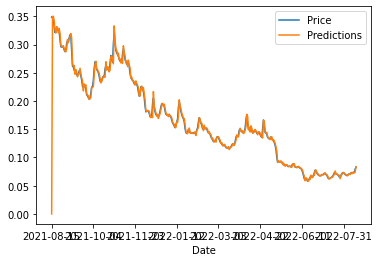

In [74]:
# Making predictions and plotting
df['Predictions'] = list(result.predict(0, len(df)-1))
df.plot()
#df.head()

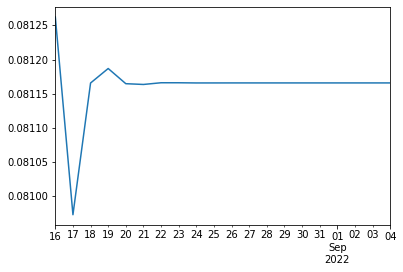

In [75]:
# Forecast for 20 future dates after training data ends
result.forecast(20).plot()

### Problem 6 (1 point)

- Evaluate the ARIMA model using Ljung Box test. Based on p-value infer if the Model shows lack of fit

Hint: Pass the `res.resid` (Residuals of the ARIMA model) as input the Ljung-Box Text.      
Pass `lags=[10]`. Set `return_df=True`
For inference, refer back to the Null and Alternate Hypotheses of Ljung-Box test. (If p value high, Null Hypothesis is significant)

In [76]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(result.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,0.929177,0.999877


p-value>0.05, hence null hypothesis not rejected. It can be concluded that model does not show lack of fit.